In [1]:
from classifiers import NaiveBayes, LDA, QDA
from generate_data import generate_data_scheme_1, generate_data_scheme_2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
rho = 0.5
a_list = [0.1, 0.5, 1, 2, 3, 5]

models = [NaiveBayes(), LDA(), QDA()]

test_sizes = [0.05, 0.1, 0.2, 0.3, 0.4]

In [3]:
for model in models:
    print(model.name)

Naive Bayes
LDA
QDA


In [4]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

## Single experiment

In [16]:
for a in a_list:
    print(f"\tCurrent value of a = {a}")
    
    X, y = generate_data_scheme_1(1000, a)
     
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=123
    )

    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy(y_test, y_pred)
        
        res.append([model.name, a, acc, scheme+1])
        print(f"\t\tModel {model.name} accuracy: {round(acc*100, 2)}%")

	Current value of a = 0.1
		Model Naive Bayes accuracy: 53.0%
		Model LDA accuracy: 53.5%
		Model QDA accuracy: 55.5%
	Current value of a = 0.5
		Model Naive Bayes accuracy: 60.0%
		Model LDA accuracy: 61.25%
		Model QDA accuracy: 60.25%
	Current value of a = 1
		Model Naive Bayes accuracy: 80.25%
		Model LDA accuracy: 80.25%
		Model QDA accuracy: 80.5%
	Current value of a = 2
		Model Naive Bayes accuracy: 91.25%
		Model LDA accuracy: 92.0%
		Model QDA accuracy: 91.25%
	Current value of a = 3
		Model Naive Bayes accuracy: 98.75%
		Model LDA accuracy: 98.0%
		Model QDA accuracy: 98.75%
	Current value of a = 5
		Model Naive Bayes accuracy: 100.0%
		Model LDA accuracy: 100.0%
		Model QDA accuracy: 100.0%


In [15]:
for a in a_list:
    print(f"\tCurrent value of a = {a}")
    
    X, y = generate_data_scheme_2(1000, a, rho)
        
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=123
    )

    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy(y_test, y_pred)
        
        res.append([model.name, a, acc, scheme+1])
        print(f"\t\tModel {model.name} accuracy: {round(acc*100, 2)}%")

	Current value of a = 0.1
		Model Naive Bayes accuracy: 50.0%
		Model LDA accuracy: 44.75%
		Model QDA accuracy: 51.5%
	Current value of a = 0.5
		Model Naive Bayes accuracy: 60.0%
		Model LDA accuracy: 61.0%
		Model QDA accuracy: 59.5%
	Current value of a = 1
		Model Naive Bayes accuracy: 69.0%
		Model LDA accuracy: 68.0%
		Model QDA accuracy: 67.75%
	Current value of a = 2
		Model Naive Bayes accuracy: 87.5%
		Model LDA accuracy: 88.0%
		Model QDA accuracy: 87.75%
	Current value of a = 3
		Model Naive Bayes accuracy: 97.0%
		Model LDA accuracy: 96.25%
		Model QDA accuracy: 97.0%
	Current value of a = 5
		Model Naive Bayes accuracy: 100.0%
		Model LDA accuracy: 100.0%
		Model QDA accuracy: 100.0%


## Experiments on multiple test-train splits

In [5]:
columns = ['model', 'a', 'acc', 'scheme']
res = []

for scheme in range(2):

    for test_size in test_sizes:

        for a in a_list:
            # print(f"Current value of a = {a}")
            
            if scheme == 0:
                X, y = generate_data_scheme_1(1000, a)
            else:
                X, y = generate_data_scheme_2(1000, a, rho)
                
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=test_size, random_state=123
            )

            
            for model in models:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                acc = accuracy(y_test, y_pred)
                
                res.append([model.name, a, acc, scheme+1])
                # print(f"\tModel {model.name} accuracy: {round(acc*100, 2)}%")

In [6]:
import seaborn as sns

df = pd.DataFrame(res, columns=columns)

nb_df = df[df['model'] == 'Naive Bayes']
lda_df = df[df['model'] == 'LDA']
qda_df = df[df['model'] == 'QDA']


Text(0.5, 1.0, 'Naive Bayes')

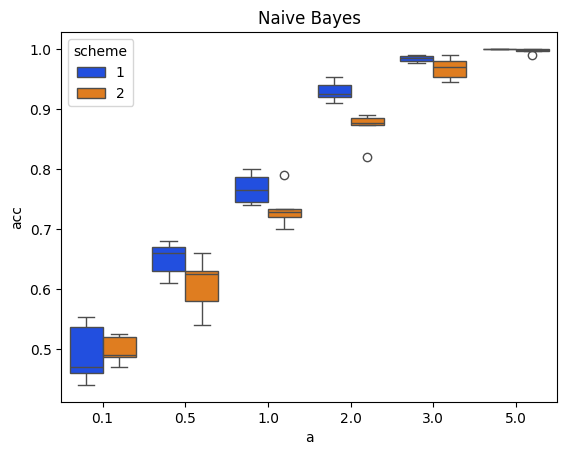

In [7]:
sns.boxplot(x="a", y="acc", hue="scheme", data=nb_df, palette="bright").set_title("Naive Bayes")

Text(0.5, 1.0, 'LDA')

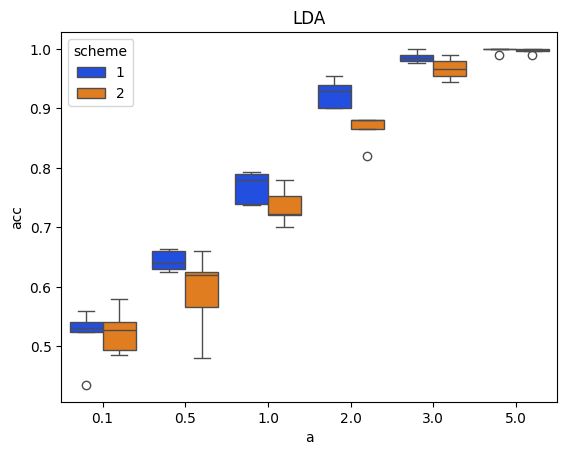

In [8]:
sns.boxplot(x="a", y="acc", hue="scheme", data=lda_df, palette="bright").set_title("LDA")

Text(0.5, 1.0, 'QDA')

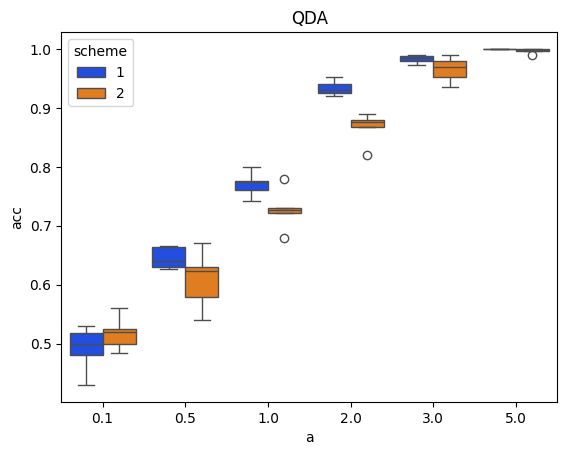

In [9]:
sns.boxplot(x="a", y="acc", hue="scheme", data=qda_df, palette="bright").set_title("QDA")

In all cases we can see, that the higher `a` is, the better performances are done by all the models. In all the cases accuracy is much higher when the dataset was generated with scheme no.1.